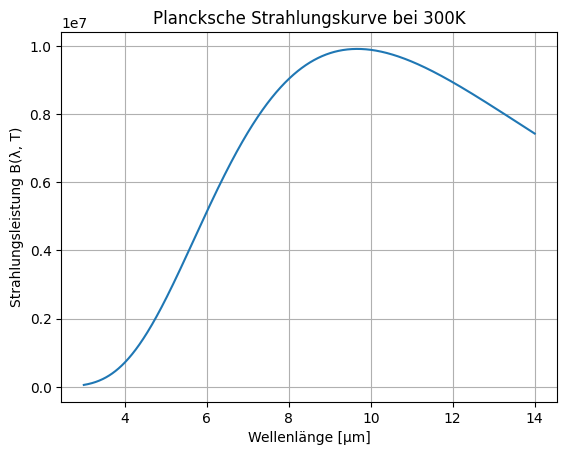

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def planck(wavelength_um, T):
    h = 6.626e-34
    c = 3.0e8
    k = 1.38e-23
    wavelength_m = wavelength_um * 1e-6
    B = (2*h*c**2)/(wavelength_m**5) * 1/(np.exp(h*c/(wavelength_m*k*T)) - 1)
    return B

wavelengths = np.linspace(3, 14, 1000)  # 3–14 µm
B = planck(wavelengths, T=300)  # z. B. 300K (Raumtemperatur)

plt.plot(wavelengths, B)
plt.title("Plancksche Strahlungskurve bei 300K")
plt.xlabel("Wellenlänge [µm]")
plt.ylabel("Strahlungsleistung B(λ, T)")
plt.grid(True)
plt.show()



In [5]:
import scipy.io

# Datei laden
data = scipy.io.loadmat("hadar_cube.mat")

# Alle enthaltenen Variablennamen anzeigen

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'S'])


In [6]:
import numpy as np

def inverse_planck(I, wavelength_um, epsilon=1.0):
    """
    Wandelt Intensität I (W/m²/sr/µm) bei Wellenlänge λ (in µm) in Temperatur (K) um.
    """
    h = 6.626e-34
    c = 3.0e8
    k = 1.38e-23
    λ = wavelength_um * 1e-6  # µm → m

    I_corr = I / epsilon
    numerator = h * c
    denominator = λ * k * np.log((2*h*c**2)/(λ**5 * I_corr) + 1)
    T = numerator / denominator
    return T


S = data['S']

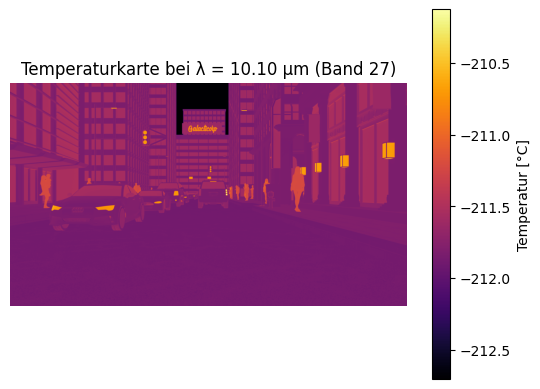

In [7]:
# Wellenzahlen von 720 bis 1250 in 10er-Schritten
wavenumbers = np.arange(720, 1251, 10)  # → 54 Werte
# Wellenlängen aus Wellenzahlen berechnen
wavelengths_um = 1e4 / wavenumbers  # Umrechnung zu µm

# z. B. Band 27 entspricht etwa λ ≈ 10.0 µm
band_index = 27
λ = wavelengths_um[band_index]
I = S[:, :, band_index]

# Temperatur berechnen
T_map = inverse_planck(I, wavelength_um=λ, epsilon=1.0)
T_Celsius = T_map - 273.15  # Kelvin → Celsius

# Anzeigen
import matplotlib.pyplot as plt

plt.imshow(T_Celsius, cmap='inferno')
plt.title(f"Temperaturkarte bei λ = {λ:.2f} µm (Band {band_index})")
plt.colorbar(label="Temperatur [°C]")
plt.axis('off')
plt.show()


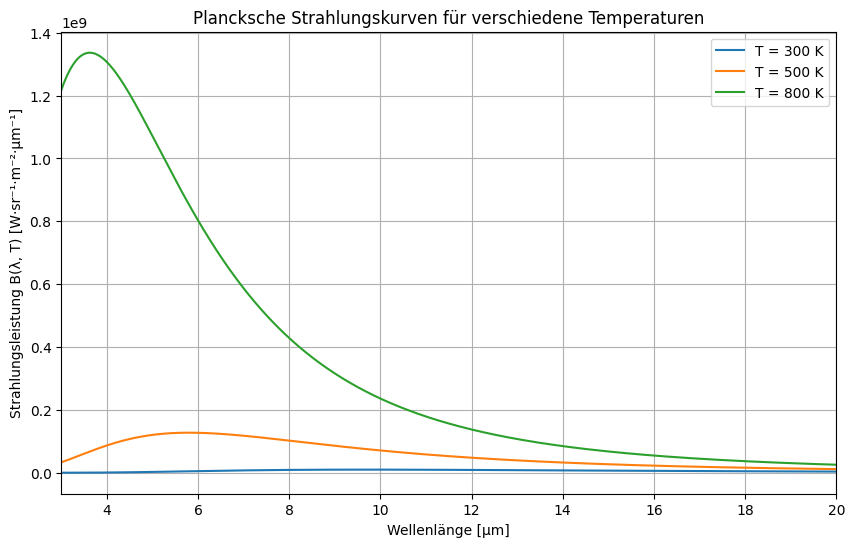

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def planck_law(wavelength_um, T):
    """
    Berechnet die Strahlungsleistung nach dem Planckschen Gesetz.
    wavelength_um: Wellenlänge in µm
    T: Temperatur in Kelvin
    Rückgabe: Strahlungsintensität B(λ, T) [W·sr⁻¹·m⁻²·µm⁻¹]
    """
    h = 6.626e-34  # Planck-Konstante
    c = 3e8        # Lichtgeschwindigkeit
    k = 1.38e-23   # Boltzmann-Konstante
    λ = wavelength_um * 1e-6  # µm → m

    B = (2*h*c**2) / (λ**5) / (np.exp((h*c)/(λ*k*T)) - 1)
    return B

# Wellenlängenbereich für LWIR (z. B. 3–20 µm)
wavelengths = np.linspace(3, 20, 1000)

# Temperaturen (z. B. 300K = Raumtemperatur, 500K = heißes Objekt)
temperatures = [300, 500, 800]

# Plot
plt.figure(figsize=(10, 6))
for T in temperatures:
    B = planck_law(wavelengths, T)
    plt.plot(wavelengths, B, label=f"T = {T} K")

plt.xlabel("Wellenlänge [µm]")
plt.ylabel("Strahlungsleistung B(λ, T) [W·sr⁻¹·m⁻²·µm⁻¹]")
plt.title("Plancksche Strahlungskurven für verschiedene Temperaturen")
plt.grid(True)
plt.legend()
plt.xlim(3, 20)
plt.show()


In [9]:
import scipy.io

# Datei laden
data = scipy.io.loadmat("HueLib_FullDatabase.mat")

# Alle enthaltenen Variablennamen anzeigen

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'HueLib'])
